In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


income_df = pd.read_excel('ny_zip_income.xls',header=3,usecols=[0,1,2,16,17,18])

### Explore Income dataset

In [2]:
income_df.head().T

,0,1,2,3,4
ZIP\ncode [1],NaN,NaN,0,0,0
Size of adjusted gross income,NaN,NaN,Total,"$1 under $25,000","$25,000 under $50,000"
Number of returns,NaN,-1,9.46806e+06,3.44531e+06,2.12396e+06
Adjusted gross income (AGI) [4],NaN,-15,7.84411e+08,4.19902e+07,7.72745e+07
Total income,Number of returns,-16,9468050,3445290,2123960
Unnamed: 18,Amount,-17,795119743,42897756,78326525


### Data Cleaning - Income dataset

In [3]:
#rename columns
income_df = income_df.rename(columns={income_df.columns[0]: "zip_code", 
                                      income_df.columns[1]: "agi_bucket", 
                                      income_df.columns[2]: "num_returns", 
                                      income_df.columns[3]: "agi", 
                                      income_df.columns[4]: "tot_inc_num_returns", 
                                      income_df.columns[5]: "tot_inc_amnt"})
#only take the meaningful rows, avoiding totals
income_df = income_df.iloc[3:12329]

In [4]:
#change dollars (in thousands) columns to exact dollars
income_df['agi'] = income_df['agi']*1000
income_df['tot_inc_amnt'] = income_df['tot_inc_amnt']*1000

In [5]:
#drop rows that don't contain an agi_bucket value, they are pointless
income_df.dropna(subset=['agi_bucket'],inplace=True)

In [6]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9246 entries, 3 to 12328
Data columns (total 6 columns):
zip_code               9246 non-null object
agi_bucket             9246 non-null object
num_returns            9246 non-null float64
agi                    9246 non-null float64
tot_inc_num_returns    9246 non-null object
tot_inc_amnt           9246 non-null object
dtypes: float64(2), object(4)
memory usage: 505.6+ KB


In [7]:
#remove Zipcodes 0 & 99999
income_df = income_df.iloc[6:-6] 

In [8]:
#reset dataframe index
income_df.reset_index(drop=True,inplace=True)

In [9]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9234 entries, 0 to 9233
Data columns (total 6 columns):
zip_code               9234 non-null object
agi_bucket             9234 non-null object
num_returns            9234 non-null float64
agi                    9234 non-null float64
tot_inc_num_returns    9234 non-null object
tot_inc_amnt           9234 non-null object
dtypes: float64(2), object(4)
memory usage: 432.9+ KB


In [10]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt
0,10001,"$1 under $25,000",3740.0,43182000.0,3740,44849000
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500,94324000
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950,123197000
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410,123605000
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580,366195000


In [11]:
#show rows that have a num_returns discrepancy
income_df[income_df['tot_inc_num_returns'] != income_df['num_returns']]

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt
1584,11355,"$1 under $25,000",34950.0,401891000.0,34940,412155000
7067,13833,"$200,000 or more",30.0,12181000.0,20,12181000
9105,14874,"$75,000 under $100,000",20.0,2656000.0,30,2656000


In [12]:
#convert zip_code column to integer datatype
income_df['zip_code'].astype('int64')

0       10001
1       10001
2       10001
3       10001
4       10001
5       10001
6       10002
7       10002
8       10002
9       10002
10      10002
11      10002
12      10003
13      10003
14      10003
15      10003
16      10003
17      10003
18      10004
19      10004
20      10004
21      10004
22      10004
23      10004
24      10005
25      10005
26      10005
27      10005
28      10005
29      10005
        ...  
9204    14898
9205    14898
9206    14898
9207    14898
9208    14898
9209    14898
9210    14901
9211    14901
9212    14901
9213    14901
9214    14901
9215    14901
9216    14903
9217    14903
9218    14903
9219    14903
9220    14903
9221    14903
9222    14904
9223    14904
9224    14904
9225    14904
9226    14904
9227    14904
9228    14905
9229    14905
9230    14905
9231    14905
9232    14905
9233    14905
Name: zip_code, Length: 9234, dtype: int64

### Filter New York State zip codes down to only New York City zip codes

In [13]:
#load data
nyc_zips_df = pd.read_csv('zip_borough.csv',usecols=[0]) #SOURCE: https://www.kaggle.com/kimjinyoung/nyc-borough-zip/downloads/nyc-borough-zip.zip/2


In [14]:
nyc_zips_df.head()

,zip
0,10001
1,10002
2,10003
3,10004
4,10005


In [15]:
#reset the income_df to only include NYC zip codes as seen in the nyc_zips_df
income_df = income_df[income_df['zip_code'].isin(nyc_zips_df['zip'])].reset_index(drop=True)

In [16]:
#convert numerical columns to float datatype
income_df['tot_inc_num_returns'] = income_df['tot_inc_num_returns'].astype('float64')
income_df['tot_inc_amnt'] = income_df['tot_inc_amnt'].astype('float64')

In [17]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 6 columns):
zip_code               1062 non-null object
agi_bucket             1062 non-null object
num_returns            1062 non-null float64
agi                    1062 non-null float64
tot_inc_num_returns    1062 non-null float64
tot_inc_amnt           1062 non-null float64
dtypes: float64(4), object(2)
memory usage: 49.9+ KB


In [18]:
income_df.describe()

,num_returns,agi,tot_inc_num_returns,tot_inc_amnt
count,1062.000000,1.062000e+03,1062.000000,1.062000e+03
mean,3785.969868,3.079024e+08,3785.960452,3.118991e+08
std,4365.667804,8.275105e+08,4365.600534,8.383446e+08
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1070.000000,8.402525e+07,1070.000000,8.529400e+07
50%,2400.000000,1.599225e+08,2400.000000,1.615430e+08
75%,4897.500000,2.712135e+08,4897.500000,2.753948e+08
max,36120.000000,9.954884e+09,36120.000000,1.008504e+10


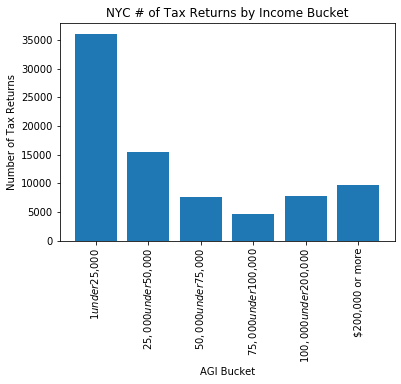

In [19]:
plt.bar(income_df['agi_bucket'],income_df['tot_inc_num_returns'])
plt.xticks(rotation='vertical')
plt.xlabel('AGI Bucket')
plt.ylabel('Number of Tax Returns')
plt.title('NYC # of Tax Returns by Income Bucket');

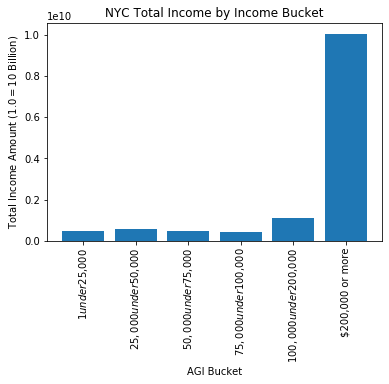

In [20]:
plt.bar(income_df['agi_bucket'],income_df['tot_inc_amnt'])
plt.xticks(rotation='vertical')
plt.xlabel('AGI Bucket')
plt.ylabel('Total Income Amount ($1.0 = $10 Billion)')
plt.title('NYC Total Income by Income Bucket');


#### Gut Check

In [21]:
#https://smartasset.com/retirement/average-salary-in-nyc:
print('SMARTASSET.COM STATS:')
print(' ')
print('Mean Income - Household - NYC: $93,196')
print('Mean Income - Individual - NYC: $74,834')
print(' ')
#our IRS dataset:
print('OUR IRS STATS:')
print(' ')
sum_total_inc = income_df['tot_inc_amnt'].sum()
sum_num_returns = income_df['tot_inc_num_returns'].sum()
mean_inc_per_return = sum_total_inc / sum_num_returns
print (f"Total Income - NYC: ${sum_total_inc}")
print (f"Total # of Returns - NYC: {sum_num_returns}")
print (f"Mean Income Per Tax Return - NYC: ${mean_inc_per_return}")



SMARTASSET.COM STATS:
 
Mean Income - Household - NYC: $93,196
Mean Income - Individual - NYC: $74,834
 
OUR IRS STATS:
 
Total Income - NYC: $331236847000.0
Total # of Returns - NYC: 4020690.0
Mean Income Per Tax Return - NYC: $82383.08524158789


 - Our dataset's mean income generally aligns with mean income numbers reported by a 3rd party site - SmartAsset.com

In [22]:
income_df['avg_inc_by_zip_and_bucket'] = income_df['tot_inc_amnt']/income_df['tot_inc_num_returns']

In [23]:
income_df.head(30)

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket
0,10001,"$1 under $25,000",3740.0,4.318200e+07,3740.0,4.484900e+07,1.199171e+04
1,10001,"$25,000 under $50,000",2500.0,9.213300e+07,2500.0,9.432400e+07,3.772960e+04
2,10001,"$50,000 under $75,000",1950.0,1.209220e+08,1950.0,1.231970e+08,6.317795e+04
3,10001,"$75,000 under $100,000",1410.0,1.218800e+08,1410.0,1.236050e+08,8.766312e+04
4,10001,"$100,000 under $200,000",2580.0,3.614530e+08,2580.0,3.661950e+08,1.419360e+05
5,10001,"$200,000 or more",2340.0,1.551726e+09,2340.0,1.570914e+09,6.713308e+05
6,10002,"$1 under $25,000",21180.0,2.511690e+08,21180.0,2.558910e+08,1.208173e+04
7,10002,"$25,000 under $50,000",8210.0,2.965570e+08,8210.0,3.019100e+08,3.677345e+04
8,10002,"$50,000 under $75,000",4810.0,2.945660e+08,4810.0,2.987460e+08,6.210936e+04
9,10002,"$75,000 under $100,000",2710.0,2.344450e+08,2710.0,2.368920e+08,8.741402e+04


#### Arithmetic Average Income by Zip

In [25]:
#ADD AVERAGE INCOME BY ZIP CODE
avg_income_by_zip_df = income_df.groupby(['zip_code']).sum()
avg_income_by_zip_df.drop(columns=['num_returns', 'agi'],inplace=True)
avg_income_by_zip_df['avg_inc_by_zip'] = avg_income_by_zip_df['tot_inc_amnt'] / avg_income_by_zip_df['tot_inc_num_returns']

In [26]:
avg_income_by_zip_df.head()

,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,avg_inc_by_zip
zip_code,,,,
10001,14520.0,2.323084e+09,1.013829e+06,159992.011019
10002,42180.0,2.313723e+09,7.732248e+05,54853.556188
10003,28660.0,6.720746e+09,1.153619e+06,234499.162596
10004,2480.0,8.308280e+08,1.177613e+06,335011.290323
10005,5940.0,3.171561e+09,2.091357e+06,533932.828283


## Alternative Computations to understand Incomes by Zip Code

#### Estimating a Median Income Using the Arithmetic Average Income by Zip & IncomeBucket (that falls in the center based on the number of tax returns filed in each Zip Code)

In [37]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket
0,10001,"$1 under $25,000",3740.0,43182000.0,3740.0,44849000.0,11991.711230
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500.0,94324000.0,37729.600000
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950.0,123197000.0,63177.948718
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410.0,123605000.0,87663.120567
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580.0,366195000.0,141936.046512


In [45]:
avg_income_by_zip_df['median_point'] = avg_income_by_zip_df['tot_inc_num_returns']/2

In [55]:
income_df = pd.merge(left=income_df,right=avg_income_by_zip_df['median_point'], how='left',on='zip_code')

In [56]:
income_df['cumu_sum'] = income_df.groupby('zip_code')['tot_inc_num_returns'].transform(pd.Series.cumsum)

In [58]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,cumu_sum,median_point
0,10001,"$1 under $25,000",3740.0,43182000.0,3740.0,44849000.0,11991.711230,3740.0,7260.0
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500.0,94324000.0,37729.600000,6240.0,7260.0
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950.0,123197000.0,63177.948718,8190.0,7260.0
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410.0,123605000.0,87663.120567,9600.0,7260.0
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580.0,366195000.0,141936.046512,12180.0,7260.0


In [118]:
income_df['diff_cumu_median'] = income_df['cumu_sum'] - income_df['median_point']
income_df['estimated_median'] = income_df['avg_inc_by_zip_and_bucket']

In [119]:
income_df.loc[income_df['diff_cumu_median'] < 0, 'estimated_median'] = None
income_df.loc[income_df['diff_cumu_median'] < 0, 'diff_cumu_median'] = None

In [120]:
income_df.head()

,zip_code,agi_bucket,num_returns,agi,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,cumu_sum,median_point,estimated_median,diff_cumu_median
0,10001,"$1 under $25,000",3740.0,43182000.0,3740.0,44849000.0,11991.711230,3740.0,7260.0,NaN,NaN
1,10001,"$25,000 under $50,000",2500.0,92133000.0,2500.0,94324000.0,37729.600000,6240.0,7260.0,NaN,NaN
2,10001,"$50,000 under $75,000",1950.0,120922000.0,1950.0,123197000.0,63177.948718,8190.0,7260.0,63177.948718,930.0
3,10001,"$75,000 under $100,000",1410.0,121880000.0,1410.0,123605000.0,87663.120567,9600.0,7260.0,87663.120567,2340.0
4,10001,"$100,000 under $200,000",2580.0,361453000.0,2580.0,366195000.0,141936.046512,12180.0,7260.0,141936.046512,4920.0


In [99]:
income_df[['zip_code','diff_cumu_median']].groupby(['zip_code']).min()

,diff_cumu_median
zip_code,
10001,930.0
10002,90.0
10003,1750.0
10004,390.0
10005,1350.0
10006,615.0
10007,150.0
10009,15.0
10010,690.0


In [59]:
avg_income_by_zip_df.head()

,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip_and_bucket,avg_inc_by_zip,median_point
zip_code,,,,,
10001,14520.0,2.323084e+09,1.013829e+06,159992.011019,7260.0
10002,42180.0,2.313723e+09,7.732248e+05,54853.556188,21090.0
10003,28660.0,6.720746e+09,1.153619e+06,234499.162596,14330.0
10004,2480.0,8.308280e+08,1.177613e+06,335011.290323,1240.0
10005,5940.0,3.171561e+09,2.091357e+06,533932.828283,2970.0


### Explore Parks Dataset

In [ ]:
parks_df = pd.read_json('DPR_Parks_001.json')

In [ ]:
parks_df.head(30)

In [ ]:
parks_df.info()

In [ ]:
parks_df.nunique()

In [ ]:
#explore duplicate park names
parks_df[parks_df.duplicated(subset=['Name'],keep=False)].sort_values(by=['Name'])

- Insight: park names may span multiple Prop_ID's and multiple Zip Codes
- All 1,675 Prop_IDs are unique to each row - Keep all prop_id's

In [ ]:
parks_df.describe()

### Explore Playgrounds dataset

In [ ]:
playgrounds_df = pd.read_json('DPR_Playgrounds_001.json')

In [ ]:
playgrounds_df.head(30)

In [ ]:
playgrounds_df.info()

In [ ]:
playgrounds_df.describe()

In [ ]:
print(playgrounds_df[~playgrounds_df['School_ID'].isna()].shape) #shape of non-null School_ID dataframe
print(playgrounds_df[playgrounds_df['School_ID'].isna()].shape) #shape of null School_ID dataframe
print(playgrounds_df.shape) #shape of dataframe

In [ ]:
#remove school playgrounds from playgrounds_df
playgrounds_df = playgrounds_df[playgrounds_df['School_ID'].isna()]

In [ ]:
playgrounds_df.info()

In [ ]:
playgrounds_df.nunique()

In [ ]:
#explore duplicate Playground_ID's
playgrounds_df[playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)].sort_values(by=['Playground_ID'])

- Some Prop_IDs may have multiple playgrounds - use a left join where all playgrounds remain in the set, and relevant zip codes are added to each

In [ ]:
#drop duplicate playgrounds where lat/longs are the same 
#and those where the extra row doesn't provide new information
playgrounds_df.drop(index = [37, 996, 574, 591],inplace=True)

In [ ]:
playgrounds_df['Playground_ID'][playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)] = playgrounds_df['Prop_ID'][playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)]


In [ ]:
playgrounds_df[playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)]

In [ ]:
#add tag to Playground_ID=B431 (Brooklyn Bridge park) to mark the multiple playgrounds
playgrounds_df.loc[1242,'Playground_ID'] = 'B431_1'
playgrounds_df.loc[1243,'Playground_ID'] = 'B431_2'
playgrounds_df.loc[1244,'Playground_ID'] = 'B431_3'
playgrounds_df.loc[1245,'Playground_ID'] = 'B431_4'
playgrounds_df.loc[1246,'Playground_ID'] = 'B431_5'
playgrounds_df.loc[1247,'Playground_ID'] = 'B431_6'
playgrounds_df.loc[1248,'Playground_ID'] = 'B431_7'
playgrounds_df.loc[1249,'Playground_ID'] = 'B431_8'

In [ ]:
#recheck duplicate playgrounds to ensure all are unique
playgrounds_df[playgrounds_df.duplicated(subset=['Playground_ID'],keep=False)]

In [ ]:
#Drop School & Status columns from new playgrounds_df
playgrounds_df.drop(columns=['School_ID', 'Status'],inplace=True)

### Add Zip Codes from Parks dataset to Playground dataset using LEFT JOIN (playground = left df, parks = right df) on Prop_ID

In [ ]:
playgrounds_zip_df = pd.merge(left=playgrounds_df, right=parks_df[['Prop_ID','Zip']], how='left', on='Prop_ID')

In [ ]:
playgrounds_zip_df.head(20)

### Join Playground w/ Zip Codes dataset with Income by Zip Code dataset

In [ ]:


nyc_zips_df = pd.read_csv('zip_borough.csv') 